In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st
import math
import random

In [2]:
def mandelbrot_test(c:complex, iter_max):
    # return: the number of iterations (<= maximum iteration)
    z = complex(0,0)
    iter_num = 0
    for i in range(iter_max):
        z = z*z + c
        if np.abs(z) <= 2:
            iter_num += 1
        else:
            break
    return iter_num

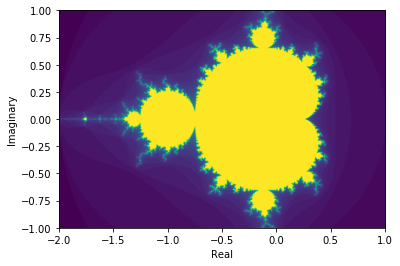

In [3]:
# generate 1200*800 pixels
x = np.linspace(-2, 1, 1200, endpoint = True)
y = np.linspace(-1, 1, 800, endpoint = True)
atlas = np.zeros((len(x), len(y))) #initial value of each pixel is 0

# assign value to each pixel according to iteration number
for i in range(len(x)):
    for j in range(len(y)):
        real = x[i]
        image = y[j]
        c = complex(real, image)
        atlas[i,j] = mandelbrot_test(c, iter_max = 50)

# color the pixels according to the iteration number
plt.imshow(atlas.T, interpolation = 'bilinear', extent = [-2, 1, -1, 1])
plt.xlabel('Real')
plt.ylabel('Imaginary')
# plt.savefig('mandelbrot set itr1000', dpi = 500)
plt.savefig('mandelbrot set itr50', dpi = 500)
plt.show()

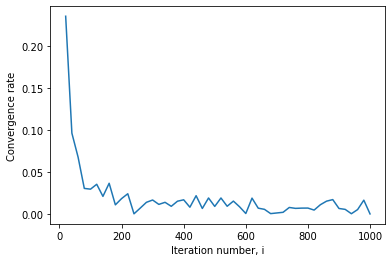

In [4]:
# fix s=1000, investigate the convergence with different iteration numbers
average_area = []
for i in np.linspace(20, 1000, 50):
    area_list = []
    for k in range(100):
        count = 0
        area = 0
        for s in range(1000):
            x = np.random.uniform(-2, 1)
            y = np.random.uniform(-1, 1)
            c = complex(x, y)
            iteration = mandelbrot_test(c, iter_max = int(i))
            if iteration == int(i):
                count += 1
            else:
                pass
            area = count / 1000 * 6
        area_list.append(area)

    average_area.append(np.average(area_list))

# plot
plt.plot(np.linspace(20, 1000, 50), np.abs(np.array(average_area)-np.array(average_area[-1])))
plt.xlabel('Iteration number, i')
plt.ylabel('Convergence rate')

# plt.savefig('Conergence rate vs iterations', dpi = 500)
plt.show()

In [5]:
def mandel_area(x, y, i):
    count = 0
    for j in range(int(len(x))):
        c = complex(x[j], y[j])
        iteration = mandelbrot_test(c, iter_max = i)
        if iteration == int(i):
            count += 1
        else:
            pass
        aream = count/int(len(x)) * 6
    return aream

#### Sampling methods - random, orthogonal, latin hypercube sampling

In [6]:
def sample(n, type, x_low_limits, x_high_limits, y_low_limits, y_high_limits):
    X_list = []
    Y_list = []
    
    # random sampling
    if type == "random":
        for i in range(n):
            x = np.random.uniform(x_low_limits, x_high_limits)
            y = np.random.uniform(y_low_limits, y_high_limits)
            X_list.append(x)
            Y_list.append(y)
        return X_list, Y_list

    # orthogonal sampling
    if type == "Orthogonal":
        row_range = x_high_limits - x_low_limits
        col_range = y_high_limits - y_low_limits
        subsets = int(np.sqrt(n))
        row_count = subsets ** 2
        col_count = subsets ** 2
        x_subrange = row_range / row_count
        y_subrange = col_range / col_count
        # set initial condition: all rows and columns are not used as 0.
        rows = np.zeros(row_count)
        cols = np.zeros(col_count)
        for subset_x in range(subsets):
            for subset_y in range(subsets):
                # check every subset if options are used
                x_options = rows[subsets * subset_x:subsets * (subset_x + 1)] == 0
                # list all the free options index in the x_options
                x_free_options = [i + subset_x * subsets for i, value in enumerate(x_options) if value == True]
                # random choose one index of the free options
                x_chosen = np.random.choice(x_free_options, 1)
                # turn index into value
                x_value = np.random.uniform(low=x_low_limits + x_subrange * x_chosen,
                                            high=x_low_limits + x_subrange * (x_chosen + 1))
                # the chosen index of x change from 0 into 1
                rows[x_chosen] = 1
                X_list.append(x_value)

                # same with y
                y_options = cols[subsets * subset_y:subsets * (subset_y + 1)] == 0
                y_free_options = [i + subset_y * subsets for i, value in enumerate(y_options) if value == True]
                y_chosen = np.random.choice(y_free_options, 1)
                y_value = np.random.uniform(low=y_low_limits + y_subrange * y_chosen,
                                            high=y_low_limits + y_subrange * (y_chosen + 1))
                cols[y_chosen] = 1
                Y_list.append(y_value)

        return X_list, Y_list

    # Linear hypercube sampling
    if type == "LHS":
        X_list = np.arange(0, n)
        X_list = x_low_limits + (X_list * (x_high_limits - x_low_limits) / n)
        X_list = X_list + (x_high_limits - x_low_limits) / n * np.squeeze(np.random.uniform(0, 1, (1, n)))

        Y_list = np.arange(0, n)
        np.random.shuffle(Y_list)
        Y_list = y_low_limits + (Y_list * (y_high_limits - y_low_limits) / n)
        Y_list = Y_list + (y_high_limits - y_low_limits) / n * np.squeeze(np.random.uniform(0, 1, (1, n)))

        return X_list, Y_list

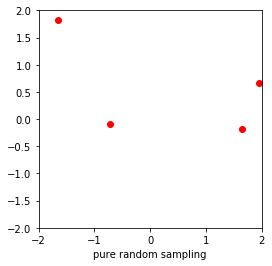

In [7]:
# random sampling plot
test1 = sample(4, type="random",  x_low_limits = -2, x_high_limits = 2, y_low_limits = -2, y_high_limits = 2)
X_random = test1[0]
Y_random = test1[1]

plt.figure(figsize = [4, 4])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("pure random sampling")
plt.scatter(X_random,Y_random, c = 'r')

# plt.savefig('random sampling plot', dpi = 500)
plt.show()

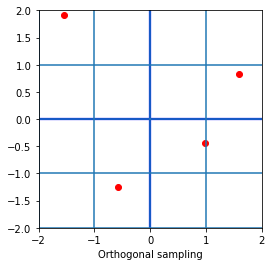

In [8]:
# orthogonal sampling plot
test2 = sample(4, type="Orthogonal", x_low_limits=-2, x_high_limits=2, y_low_limits=-2, y_high_limits=2)
X_ortho = test2[0]
Y_ortho = test2[1]

plt.figure(figsize = [4, 4])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Orthogonal sampling")
plt.scatter(X_ortho, Y_ortho, c = 'r')
plt.hlines(0, -2, 2, linewidth = 2.25, color = "blue")
plt.vlines(0, -2, 2, linewidth = 2.25, color = "blue")

for i in np.arange(-2, 2, 1):
    plt.axvline(i)
for i in np.arange(-2, 2, 1):
    plt.axhline(i)

# plt.savefig('orthogonal sampling plot', dpi = 500)
plt.show()

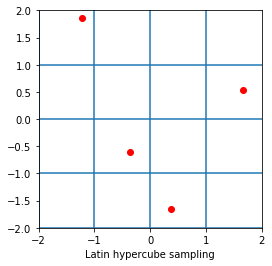

In [9]:
# LHS sampling plot
test3 = sample(4, type="LHS", x_low_limits = -2, x_high_limits = 2, y_low_limits = -2, y_high_limits = 2)
X_lhs = test3[0]
Y_lhs = test3[1]

plt.figure(figsize = [4, 4])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Latin hypercube sampling")
plt.scatter(X_lhs, Y_lhs, c = 'r')

for i in np.arange(-2, 2, 1):
    plt.axvline(i)
for i in np.arange(-2, 2, 1):
    plt.axhline(i)

# plt.savefig('LHS sampling plot', dpi = 500)
plt.show()

#### Investigating the mean area and confidence interval with different sample sizes

In [10]:
space = np.linspace(10,100,19)
xais = [s**2 for s in space]

Random Sampling

In [11]:
# random sampling, fix iterations = 600
random_average_list=[]
random_std_list=[]
random_CI_list=[]

for s in xais:
    area_list = []
    for simulation in range(100):
        random_set = sample(int(s), type = "random", x_low_limits = -2, x_high_limits = 1, y_low_limits = -1, y_high_limits = 1)
        random_x = np.array(random_set[0])
        random_y = np.array(random_set[1])
        area_simu = mandel_area(random_x, random_y, 600)
        area_list.append(area_simu)
    random_average_list.append(np.mean(area_list))
    random_std_list.append(np.std(area_list,ddof=1))
    random_CI_list.append(1.96*np.std(area_list, ddof=1)/np.sqrt(int(s)))

print(random_average_list)
print(random_std_list)
print(random_CI_list)

[1.5408, 1.484, 1.5097499999999997, 1.5144960000000003, 1.493133333333333, 1.5199836734693881, 1.5063374999999997, 1.518251851851852, 1.516392, 1.5099371900826446, 1.5138166666666666, 1.5148828402366863, 1.512012244897959, 1.5130133333333335, 1.5136687500000001, 1.5144498269896196, 1.515333333333333, 1.509978947368421, 1.5139619999999996]
[0.22705706131038753, 0.16531573708904101, 0.12485218533056675, 0.10796789825936899, 0.0885014536331125, 0.07054344348342988, 0.0680108927605785, 0.05288433019113246, 0.06363263199448421, 0.04909315640670565, 0.03725522056081259, 0.044885786570271556, 0.03544539967803357, 0.037934287798729774, 0.03193932346689152, 0.030537635410847155, 0.031163887325644825, 0.03012615031147406, 0.023491097733551587]
[0.04450318401683596, 0.021601256312968022, 0.012235514162395541, 0.00846468322353453, 0.0057820949706966825, 0.003950432835072073, 0.003332533745268347, 0.0023034063816582137, 0.002494399174183781, 0.0017495015737662375, 0.0012170038716532113, 0.001353479

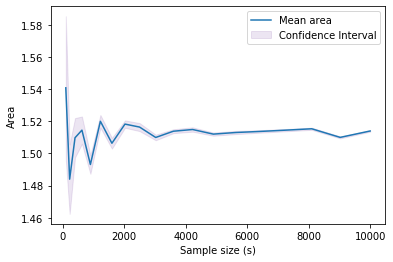

In [12]:
# plot
plt.plot(xais, random_average_list, label = 'Mean area')
plt.fill_between(xais, np.array(random_average_list) + np.array(random_CI_list),
                 np.array(random_average_list) - np.array(random_CI_list),
                 color = "indigo", alpha=0.1, edgecolor="white", label='Confidence Interval')
plt.xlabel('Sample size (s)')
plt.ylabel('Area')
plt.legend(loc = "upper right")
# plt.savefig("Random sampling result", dpi = 500)
plt.show()

Orthogonal Sampling

In [13]:
# orthogonal sampling, fix i=600
ortho_average_list = []
ortho_std_list = []
ortho_CI_list = []

for s in xais:
    area_list = []
    for simulation in range(100):
        ortho_set=sample(int(s), type = "Orthogonal", x_low_limits = -2, x_high_limits = 1, y_low_limits = -1, y_high_limits=1)
        ortho_x=np.array(ortho_set[0])
        ortho_y=np.array(ortho_set[1])
        area_simu=mandel_area(ortho_x, ortho_y, 600)
        area_list.append(area_simu)
    ortho_average_list.append(np.mean(area_list))
    ortho_std_list.append(np.std(area_list, ddof = 1))
    ortho_CI_list.append(1.96*np.std(area_list, ddof = 1)/np.sqrt(int(s)))

print(ortho_average_list)
print(ortho_std_list)
print(ortho_CI_list)

[1.5144, 1.5069333333333332, 1.5171000000000001, 1.512768, 1.5116666666666665, 1.5095999999999998, 1.5112874999999997, 1.5105777777777774, 1.51116, 1.5120991735537188, 1.5130500000000005, 1.5120710059171598, 1.513334693877551, 1.512757333333333, 1.5125343750000002, 1.5129134948096887, 1.5115333333333334, 1.51294404432133, 1.5126419999999998]
[0.11603134372777353, 0.061173852090362274, 0.044975751042291505, 0.03126962859912591, 0.026094449874516357, 0.01998728913414626, 0.016918042748927695, 0.013199679293127162, 0.014136477637657836, 0.009864623142818522, 0.010298722856760385, 0.008998328603485676, 0.009258438195702007, 0.008423938526117601, 0.0068732629520450355, 0.005882834019888982, 0.005285497534139787, 0.0050684761747380345, 0.0046781931243901394]
[0.022742143370643612, 0.007993383339807337, 0.004407623602144568, 0.0024515388821714714, 0.0017048373918017352, 0.0011192881915121904, 0.0008289840946974572, 0.0005749193647673164, 0.0005541499233961872, 0.00035153929745316913, 0.000336

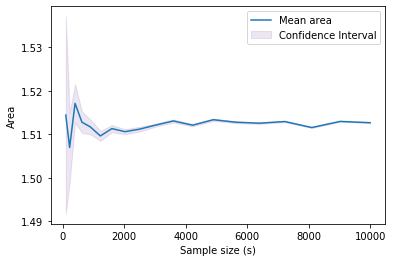

In [14]:
# plot
plt.plot(xais, ortho_average_list, label = 'Mean area')
plt.fill_between(xais, np.array(ortho_average_list) + np.array(ortho_CI_list),
                 np.array(ortho_average_list) - np.array(ortho_CI_list),
                 color = "indigo", alpha = 0.1, edgecolor = "white", label = 'Confidence Interval')

plt.xlabel('Sample size (s)')
plt.ylabel('Area')
plt.legend(loc = "upper right")
# plt.savefig('Orthogonal result', dpi = 500)
plt.show()

LHS

In [15]:
# LHS sampling, fix i=600
lhs_average_list = []
lhs_std_list = []
lhs_CI_list = []

for s in xais:
    area_list = []
    for simulation in range(100):
        lhs_set = sample(int(s), type = "LHS", x_low_limits = -2, x_high_limits = 1, y_low_limits = -1, y_high_limits = 1)
        lhs_x = lhs_set[0]
        lhs_y = lhs_set[1]
        area_simu = mandel_area(lhs_x,lhs_y,600)
        area_list.append(area_simu)
    lhs_average_list.append(np.mean(area_list))
    lhs_std_list.append(np.std(area_list,ddof = 1))
    lhs_CI_list.append(1.96*np.std(area_list,ddof = 1)/np.sqrt(int(s)))

print(lhs_average_list)
print(lhs_std_list)
print(lhs_CI_list)

[1.5072000000000003, 1.5111999999999997, 1.51125, 1.522272, 1.514, 1.5010775510204077, 1.51125, 1.5151111111111113, 1.5119280000000004, 1.5170181818181816, 1.5141000000000002, 1.5153656804733728, 1.5125755102040817, 1.5103146666666667, 1.5143906249999999, 1.511343944636678, 1.508688888888889, 1.509453739612188, 1.5149879999999998]
[0.1514247487878205, 0.10660301130925912, 0.085103546555732, 0.06637421624259063, 0.059231896039359626, 0.046201773938187723, 0.037854386079482855, 0.03559138984861486, 0.02983290190986515, 0.02531000754365323, 0.02605724079751729, 0.026778962991885598, 0.02697352849102932, 0.01919741396725882, 0.01878990781386137, 0.018393812751936734, 0.017757768699879824, 0.015468500492689618, 0.017419525095290458]
[0.029679250762412818, 0.013929460144409857, 0.008340147562461736, 0.005203738553419105, 0.003869817207904829, 0.0025872993405385127, 0.0018548649178946597, 0.0015502027578507805, 0.001169449754866714, 0.0009019566324647332, 0.0008512031993855648, 0.000807488730

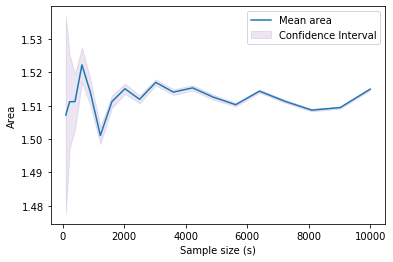

In [16]:
# plot
plt.plot(xais, lhs_average_list, label = 'Mean area')
plt.fill_between(xais, np.array(lhs_average_list) + np.array(lhs_CI_list),
                 np.array(lhs_average_list) - np.array(lhs_CI_list),
                 color = "indigo", alpha = 0.1, edgecolor = "white", label = 'Confidence Interval')

plt.xlabel('Sample size (s)')
plt.ylabel('Area')
plt.legend(loc = "upper right")
# plt.savefig("LHS result", dpi = 500)
plt.show()

Antithetic Variables - using random sampling

In [17]:
# antithetic variables - using random sampling,fix i=600
anti_average_list = []
anti_std_list = []
anti_CI_list = []

for s in xais:
    area_list = []
    for simulation in range(100):
        anti_set = sample(int(s), type = "random", x_low_limits = -2, x_high_limits = 1, y_low_limits = -1, y_high_limits = 1)
        anti_x1 = anti_set[0]
        anti_y1 = anti_set[1]
        area_sim1 = mandel_area(anti_x1, anti_y1, 600)
        
        anti_x2 = [-1-i for i in anti_x1]
        anti_y2 = [-i for i in anti_y1]
        area_sim2 = mandel_area(anti_x2, anti_y2, 600)
        
        mean_area= (area_sim1 + area_sim2)/2
        area_list.append(mean_area)

    anti_average_list.append(np.mean(area_list))
    anti_std_list.append(np.std(area_list,ddof = 1))
    anti_CI_list.append(1.96*np.std(area_list,ddof = 1)/np.sqrt(int(s)))

print(anti_average_list)
print(anti_std_list)
print(anti_CI_list)

[1.5372, 1.5148000000000004, 1.5162750000000003, 1.51344, 1.5164, 1.5116326530612243, 1.51936875, 1.5146814814814815, 1.5146279999999999, 1.5123570247933882, 1.517658333333333, 1.5149680473372782, 1.505191836734694, 1.5110719999999997, 1.5158437499999997, 1.5092885813148795, 1.5105666666666664, 1.514376731301939, 1.5085109999999997]
[0.2196741388346094, 0.15289376313583275, 0.1008095357592723, 0.07909156948522619, 0.07443114610606352, 0.0597115477391012, 0.0546255688289501, 0.04082864780594147, 0.04290732338424291, 0.03548054682390474, 0.0316422231994075, 0.035759543317359394, 0.030125817470575262, 0.02732731752801977, 0.027125386203786028, 0.026456673762295043, 0.02471780037547341, 0.020521953405090675, 0.022010603023419093]
[0.04305613121158344, 0.019978118383082145, 0.009879334504408685, 0.0062007790476417335, 0.004862834878929483, 0.0033438466733896675, 0.002676652872618555, 0.001778314437769895, 0.001681967076662322, 0.0012643976686336962, 0.0010336459578473118, 0.0010782877677234

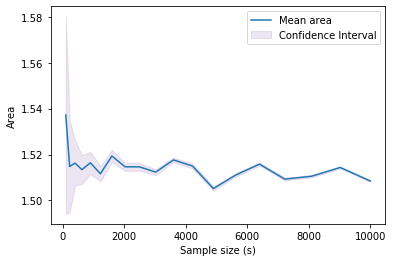

In [18]:
plt.plot(xais, anti_average_list, label = 'Mean area')
plt.fill_between(xais, np.array(anti_average_list) + np.array(anti_CI_list),
                 np.array(anti_average_list) - np.array(anti_CI_list),
                 color = "indigo", alpha=0.1, edgecolor = "white",label = 'Confidence Interval')

plt.xlabel('Sample size (s)')
plt.ylabel('Area')
plt.legend(loc="upper right")
# plt.savefig("antithetic result", dpi = 500)
plt.show()

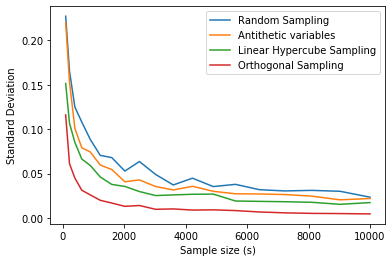

In [43]:
plt.plot(xais,random_std_list,label='Random Sampling')
plt.plot(xais,anti_std_list,label='Antithetic variables')
plt.plot(xais,lhs_std_list,label='Linear Hypercube Sampling')
plt.plot(xais,ortho_std_list,label='Orthogonal Sampling')


plt.xlabel('Sample size (s)')
plt.ylabel('Standard Deviation')
plt.legend(loc = "upper right")
plt.savefig("Comparison graph", dpi = 500)
plt.show()

---------------------------------

In [49]:
# calculate confidence interval
def conf_int(mean, var, n, p=0.95):
    pnew = (p+1)/2
    zval = st.norm.ppf(pnew)
    sigma = math.sqrt(var)
    alambda = (zval*sigma)/math.sqrt(n)
    min_lambda = mean - alambda
    plus_lambda = mean + alambda
    return min_lambda, plus_lambda

# Simulations initial values
z = 0.0j
step = 0.01

p_value = 0.95 

# run simulation return outcome of all # of simulations
def conduct_experiment(samples, simulations):
    area_list = []
    
    for s in range(1, simulations+1):
        random_set = sample(int(s), type = "random", x_low_limits = -2, x_high_limits = 1, y_low_limits = -1, y_high_limits = 1)
        random_x = np.array(random_set[0])
        random_y = np.array(random_set[1])
        area_simu = mandel_area(random_x, random_y, 600)
        area_list.append(area_simu)
    
    return area_list

In [56]:
"""plots the mean with increasing number of samples"""

# check mean change for simulations increase
simulations_mean, ci_lower, ci_higher = [], [], []
samples = 1000
simulations = np.arange(100, 1001, 100).tolist() 

# iterate over number of simulations, simulate for each 
for i in simulations:
    outcomes= (conduct_experiment(samples, i))
    area_mean = np.mean(outcomes)
    simulations_mean.append(area_mean)
    lower, higher = conf_int(np.mean(outcomes), np.var(outcomes), len(outcomes), p=0.95)
    ci_lower.append(lower)
    ci_higher.append(higher)

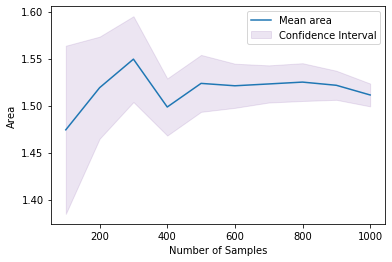

In [57]:
# plot figure with confidence interval
plt.plot(simulations, simulations_mean, label = 'Mean area')
plt.fill_between(simulations, ci_lower, ci_higher, color="indigo", alpha=0.1, label = 'Confidence Interval')

plt.ylabel('Area')
plt.xlabel('Number of Samples')
plt.legend(loc = "upper right")
plt.savefig("Mean vs Samples", dpi = 500)
plt.show()

In [62]:
"""Part 2: plots the mean with increasing simlutaions"""

# initial variables
simulations = 20
samples = np.arange(100, 1001, 100).tolist() 
samples_mean, ci_lower, ci_higher = [], [], []

# iterate of number of samples, simulate for each 
for s in samples:
    outcomes = (conduct_experiment(s, simulations))
    
    mean = np.mean(outcomes)
    samples_mean.append(mean)
    
    lower, higher = conf_int(np.mean(outcomes), np.var(outcomes), len(outcomes), p=0.95)
    ci_lower.append(lower)
    ci_higher.append(higher)

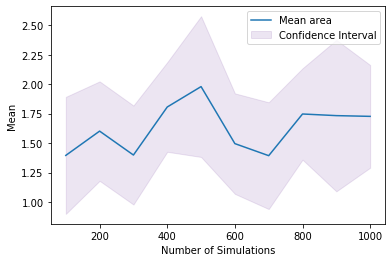

In [63]:
# plot figure with confidence interval
plt.plot(samples, samples_mean, label = 'Mean area')
plt.fill_between(samples, ci_lower, ci_higher, color="indigo", alpha=0.1, label = 'Confidence Interval')

plt.ylabel('Mean')
plt.xlabel('Number of Simulations')
plt.legend(loc = "upper right")
plt.savefig("Mean vs Simulations", dpi = 500)
plt.show()